to be done to the data:
- process nan in oil(done)
- process holiday (done)
- merge train with other info data (done)
- earthquake (remove data or add column)
- payday(done)
- lags/step (use or not) 


regressor:
xgb, rf, linreg, fb prophet

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error,r2_score


# import data

In [2]:
train_data = pd.read_csv(
    'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'int',
    },
    parse_dates=['date'],
)
test_data = pd.read_csv('test.csv',
    usecols=['store_nbr', 'family', 'date', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'int',
    },
    parse_dates=['date'],
)
holiday_data = pd.read_csv('holidays_events.csv',
    parse_dates=['date']
)
stores_data = pd.read_csv('stores.csv',
    dtype={
        'store_nbr': 'int',
        'city': 'category',
        'state': 'category',
        'type': 'category',
        'cluster': 'int',
    }                          
)
oil_data = pd.read_csv('oil.csv',
    dtype={
        'dcoilwtico': 'float',
    },
    parse_dates=['date'],
)
transaction_data = pd.read_csv('transactions.csv')

In [3]:
train_data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test_data.head()

,date,store_nbr,family,onpromotion
0,2017-08-16,1,AUTOMOTIVE,0
1,2017-08-16,1,BABY CARE,0
2,2017-08-16,1,BEAUTY,2
3,2017-08-16,1,BEVERAGES,20
4,2017-08-16,1,BOOKS,0


In [5]:
train_data["date"] = pd.to_datetime(train_data.date)
test_data["date"] = pd.to_datetime(test_data.date)
holiday_data["date"] = pd.to_datetime(holiday_data.date)
oil_data["date"] = pd.to_datetime(oil_data.date)
transaction_data["date"] = pd.to_datetime(transaction_data.date)

# analyze train data

In [6]:
train_data.tail()

,date,store_nbr,family,sales,onpromotion
3000883,2017-08-15,9,POULTRY,438.132996,0
3000884,2017-08-15,9,PREPARED FOODS,154.552994,1
3000885,2017-08-15,9,PRODUCE,2419.729004,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8
3000887,2017-08-15,9,SEAFOOD,16.000000,0


In [7]:
train_data.describe()

,date,sales,onpromotion
count,3000888,3.000888e+06,3.000888e+06
mean,2015-04-24 08:27:04.703088384,3.577758e+02,2.602770e+00
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00
25%,2014-02-26 18:00:00,0.000000e+00,0.000000e+00
50%,2015-04-24 12:00:00,1.100000e+01,0.000000e+00
75%,2016-06-19 06:00:00,1.958473e+02,0.000000e+00
max,2017-08-15 00:00:00,1.247170e+05,7.410000e+02
std,NaN,1.092778e+03,1.221888e+01


In [8]:
train_data.dtypes

date           datetime64[ns]
store_nbr            category
family               category
sales                 float32
onpromotion             int32
dtype: object

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    category      
 2   family       category      
 3   sales        float32       
 4   onpromotion  int32         
dtypes: category(2), datetime64[ns](1), float32(1), int32(1)
memory usage: 51.5 MB


In [10]:
train_data.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [11]:
train_data.duplicated().sum()

0

In [12]:
family_list = list(train_data['family'].unique())
family_list

['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='sales'>

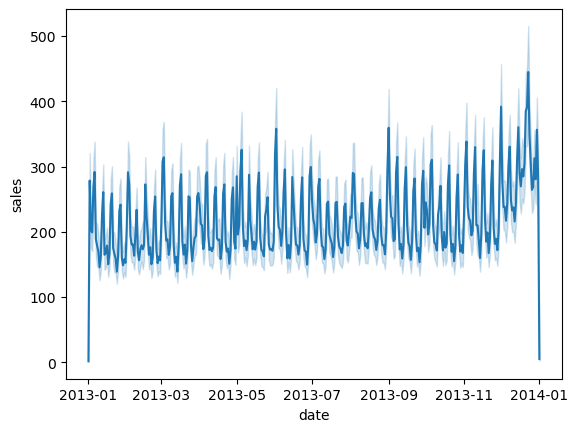

In [13]:
range_data = train_data.query('"2013-01-01" <= date <= "2014-01-01"')
sns.lineplot(range_data, x = 'date', y = 'sales')

In [14]:
# sns.lineplot(train_data, x = 'date', y = 'sales')

# analyze holiday

Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

In [15]:
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [16]:
holiday_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [17]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [18]:
holiday_data['date'].duplicated().sum()

38

In [19]:
np.where(holiday_data['date'].duplicated())

(array([  8,   9,  11,  33,  36,  40,  55,  59,  60,  62,  86, 111, 112,
        113, 119, 152, 157, 177, 178, 180, 205, 225, 236, 243, 245, 250,
        259, 260, 262, 265, 283, 291, 306, 316, 317, 319, 342, 345],
       dtype=int64),)

In [20]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [21]:
holiday_data.query('type == "Work Day"')

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [22]:
holiday_data.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

## change the transfer holiday type

In [23]:
holiday_data[(holiday_data['transferred'] == True) | (holiday_data['type'] == 'Transfer')].head()

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True


In [24]:
holiday_data.loc[holiday_data['transferred'],'type'] = "Normal"
holiday_data.loc[holiday_data['type'] == 'Transfer', 'type'] = 'Holiday'

In [25]:
holiday_data = holiday_data.drop('transferred', axis = 1)
holiday_data

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3
346,2017-12-23,Additional,National,Ecuador,Navidad-2
347,2017-12-24,Additional,National,Ecuador,Navidad-1
348,2017-12-25,Holiday,National,Ecuador,Navidad


## change the bridge to holiday

In [26]:
holiday_data['type'].unique()

array(['Holiday', 'Normal', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [27]:
holiday_data.loc[holiday_data['type'] == 'Bridge', 'type'] = 'Holiday'
holiday_data['type'].unique()

array(['Holiday', 'Normal', 'Additional', 'Work Day', 'Event'],
      dtype=object)

# analyze stores

In [28]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [29]:
stores_data['type'].unique()

['D', 'B', 'C', 'E', 'A']
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

In [30]:
stores_data.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [31]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     int32   
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type       54 non-null     category
 4   cluster    54 non-null     int32   
dtypes: category(3), int32(2)
memory usage: 2.3 KB


In [32]:
stores_data.duplicated().sum()

0

# analyze oil

In [33]:
# oil_data = oil_data.set_index('date')
# oil_data.index = pd.to_datetime(oil_data.index)
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [34]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [35]:
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [36]:
np.where(oil_data.isna())

(array([   0,   14,   34,   63,  104,  132,  174,  237,  256,  261,  274,
         294,  338,  364,  393,  434,  497,  517,  522,  534,  554,  588,
         624,  653,  699,  757,  778,  783,  794,  814,  843,  889,  914,
         959, 1017, 1039, 1044, 1054, 1079, 1118, 1149, 1174, 1175],
       dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='dcoilwtico'>

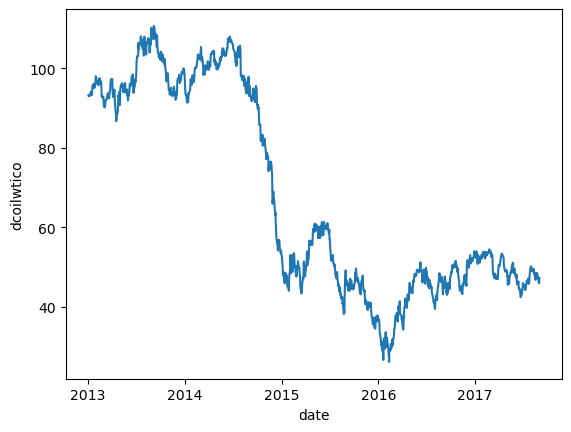

In [37]:
sns.lineplot(oil_data, x = 'date', y = 'dcoilwtico')

In [38]:
oil_data['dcoilwtico'].interpolate(method='linear',inplace= True)

In [39]:
oil_data.isna().sum()

date          0
dcoilwtico    1
dtype: int64

In [40]:
nan_ind = np.where(pd.isna(oil_data))
print(list(zip(nan_ind[0], nan_ind[1])))

[(0, 1)]


In [41]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [42]:
oil_data = oil_data.fillna(method='bfill')

C:\Users\DzakiyFaridFadhilah\AppData\Local\Temp\ipykernel_13932\3920914309.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_data = oil_data.fillna(method='bfill')


In [43]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [44]:
oil_data.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [45]:
date_range = pd.date_range(start = oil_data['date'].min(), end= oil_data['date'].max())
oil_data = oil_data.set_index('date')
oil_data = oil_data.reindex(date_range)
oil_data.index.name = 'date'

<Axes: xlabel='date'>

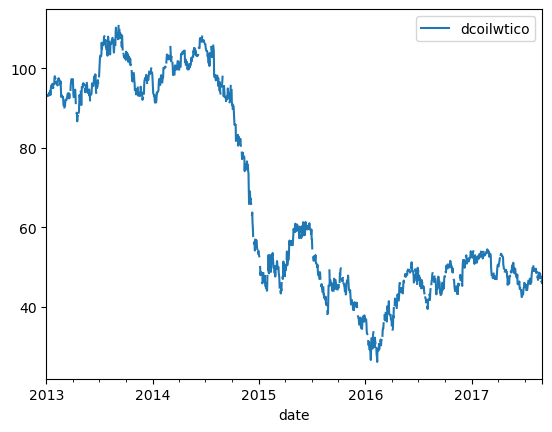

In [46]:
oil_data.plot()

In [47]:
oil_data['dcoilwtico'].interpolate(method='linear',inplace= True)

In [48]:
oil_data = oil_data.reset_index()

<Axes: >

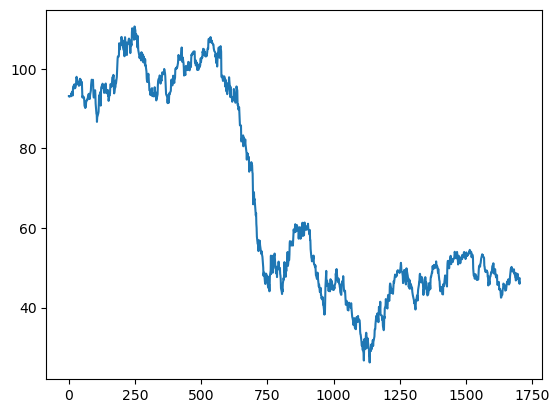

In [49]:
oil_data['dcoilwtico'].plot()

In [50]:
# oil_data.to_csv('oil_filled.csv', index= False)

# analyze transac

In [51]:
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [52]:
transaction_data.head(30)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [53]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [54]:
transaction_data.store_nbr.unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52], dtype=int64)

<Axes: xlabel='store_nbr', ylabel='transactions'>

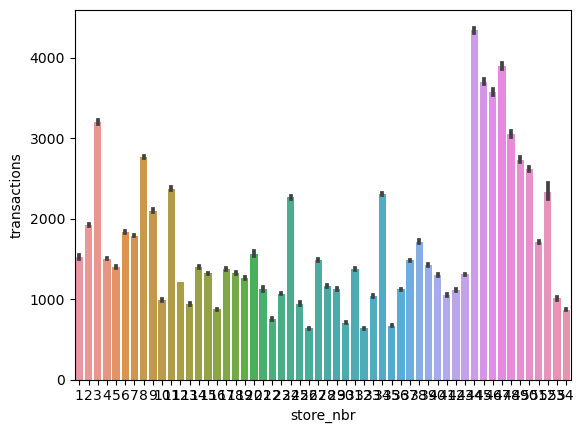

In [55]:
sns.barplot(transaction_data, x = 'store_nbr', y = 'transactions')

c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='transactions'>

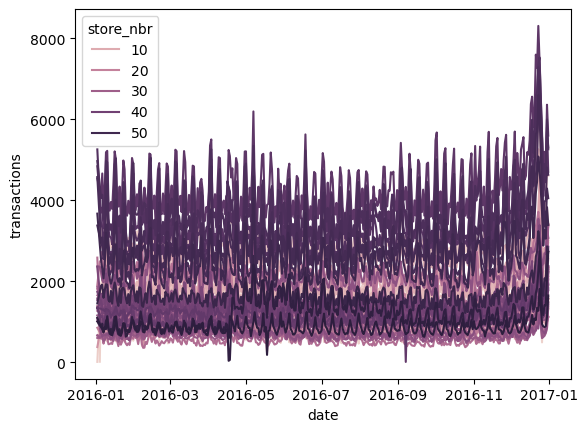

In [56]:
sns.lineplot(transaction_data[transaction_data['date'].dt.year == 2016], x = 'date', y = 'transactions', hue = 'store_nbr')

# process data

In [57]:
train_data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [58]:
train_data['store_nbr'] = train_data['store_nbr'].astype(int)
train_holi = pd.merge(train_data, holiday_data, how = 'left', on = 'date')
train_holi = train_holi.drop(['description','locale_name'], axis = 1)
train_holi[['type','locale']] = train_holi[['type','locale']].fillna('regular')

In [59]:
train_holi_oil = pd.merge(train_holi, oil_data, how = 'left', on = 'date')


In [60]:
train_holi_oil

,date,store_nbr,family,sales,onpromotion,type,locale,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.000000,0,Holiday,National,93.14
1,2013-01-01,1,BABY CARE,0.000000,0,Holiday,National,93.14
2,2013-01-01,1,BEAUTY,0.000000,0,Holiday,National,93.14
3,2013-01-01,1,BEVERAGES,0.000000,0,Holiday,National,93.14
4,2013-01-01,1,BOOKS,0.000000,0,Holiday,National,93.14
...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.132996,0,Holiday,Local,47.57
3054344,2017-08-15,9,PREPARED FOODS,154.552994,1,Holiday,Local,47.57
3054345,2017-08-15,9,PRODUCE,2419.729004,148,Holiday,Local,47.57
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8,Holiday,Local,47.57


In [61]:
train_holi_oil_store = pd.merge(train_holi_oil, stores_data, how = 'left', on = "store_nbr", suffixes=("_holiday","_stores"))

In [62]:
train_holi_oil_store.query('date == "2013-01-02"')

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster
1782,2013-01-02,1,AUTOMOTIVE,2.000000,0,regular,regular,93.14,Quito,Pichincha,D,13
1783,2013-01-02,1,BABY CARE,0.000000,0,regular,regular,93.14,Quito,Pichincha,D,13
1784,2013-01-02,1,BEAUTY,2.000000,0,regular,regular,93.14,Quito,Pichincha,D,13
1785,2013-01-02,1,BEVERAGES,1091.000000,0,regular,regular,93.14,Quito,Pichincha,D,13
1786,2013-01-02,1,BOOKS,0.000000,0,regular,regular,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2013-01-02,9,POULTRY,651.291992,0,regular,regular,93.14,Quito,Pichincha,B,6
3560,2013-01-02,9,PREPARED FOODS,83.000000,0,regular,regular,93.14,Quito,Pichincha,B,6
3561,2013-01-02,9,PRODUCE,0.000000,0,regular,regular,93.14,Quito,Pichincha,B,6
3562,2013-01-02,9,SCHOOL AND OFFICE SUPPLIES,0.000000,0,regular,regular,93.14,Quito,Pichincha,B,6


In [63]:
train_holi_oil_store.isna().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
type_holiday    0
locale          0
dcoilwtico      0
city            0
state           0
type_stores     0
cluster         0
dtype: int64

In [64]:
train_holi_oil_store.shape

(3054348, 12)

## add additional info
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this. (add payday column)
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake. (add earthquake column or remove 3 weeks data after earthquake happen)

In [65]:
train_holi_oil_store['day'] = train_holi_oil_store['date'].dt.day
train_holi_oil_store['dayofweek'] = train_holi_oil_store['date'].dt.day_of_week
train_holi_oil_store['month'] = train_holi_oil_store['date'].dt.month
train_holi_oil_store['year'] = train_holi_oil_store['date'].dt.year
train_holi_oil_store['last_day'] = train_holi_oil_store['date'].dt.is_month_end.astype(int)

In [66]:
train_holi_oil_store[train_holi_oil_store['last_day'] == 1].head()

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster,day,dayofweek,month,year,last_day
53460,2013-01-31,1,AUTOMOTIVE,0.0,0,regular,regular,97.65,Quito,Pichincha,D,13,31,3,1,2013,1
53461,2013-01-31,1,BABY CARE,0.0,0,regular,regular,97.65,Quito,Pichincha,D,13,31,3,1,2013,1
53462,2013-01-31,1,BEAUTY,2.0,0,regular,regular,97.65,Quito,Pichincha,D,13,31,3,1,2013,1
53463,2013-01-31,1,BEVERAGES,889.0,0,regular,regular,97.65,Quito,Pichincha,D,13,31,3,1,2013,1
53464,2013-01-31,1,BOOKS,0.0,0,regular,regular,97.65,Quito,Pichincha,D,13,31,3,1,2013,1


In [67]:
train_holi_oil_store['mid_month'] = (train_holi_oil_store['day'] == 15).astype(int)
train_holi_oil_store['payday'] = (train_holi_oil_store['mid_month'] == 1) | (train_holi_oil_store['last_day'] == 1)
train_holi_oil_store = train_holi_oil_store.drop(['mid_month', 'last_day'], axis = 1)
train_holi_oil_store.head()

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster,day,dayofweek,month,year,payday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False


In [68]:
train_holi_oil_store['earthquake'] = (train_holi_oil_store['date'] == '2016-04-16')
train_holi_oil_store['earthquake'] = train_holi_oil_store['earthquake'].astype(int)
train_holi_oil_store.head()

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster,day,dayofweek,month,year,payday,earthquake
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0


In [69]:
transaction_data.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

In [70]:
df = train_holi_oil_store.merge(transaction_data, left_on = ['date', 'store_nbr'], right_on=['date', 'store_nbr'], how= 'left')
df['transactions'] = df['transactions'].fillna(0)

In [71]:
df

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster,day,dayofweek,month,year,payday,earthquake,transactions
0,2013-01-01,1,AUTOMOTIVE,0.000000,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
1,2013-01-01,1,BABY CARE,0.000000,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
2,2013-01-01,1,BEAUTY,0.000000,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
3,2013-01-01,1,BEVERAGES,0.000000,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
4,2013-01-01,1,BOOKS,0.000000,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.132996,0,Holiday,Local,47.57,Quito,Pichincha,B,6,15,1,8,2017,True,0,2155.0
3054344,2017-08-15,9,PREPARED FOODS,154.552994,1,Holiday,Local,47.57,Quito,Pichincha,B,6,15,1,8,2017,True,0,2155.0
3054345,2017-08-15,9,PRODUCE,2419.729004,148,Holiday,Local,47.57,Quito,Pichincha,B,6,15,1,8,2017,True,0,2155.0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8,Holiday,Local,47.57,Quito,Pichincha,B,6,15,1,8,2017,True,0,2155.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 19 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int32         
 2   family        category      
 3   sales         float32       
 4   onpromotion   int32         
 5   type_holiday  object        
 6   locale        object        
 7   dcoilwtico    float64       
 8   city          category      
 9   state         category      
 10  type_stores   category      
 11  cluster       int32         
 12  day           int32         
 13  dayofweek     int32         
 14  month         int32         
 15  year          int32         
 16  payday        bool          
 17  earthquake    int32         
 18  transactions  float64       
dtypes: bool(1), category(4), datetime64[ns](1), float32(1), float64(2), int32(8), object(2)
memory usage: 235.9+ MB


In [73]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots(figsize=(12, 6))
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

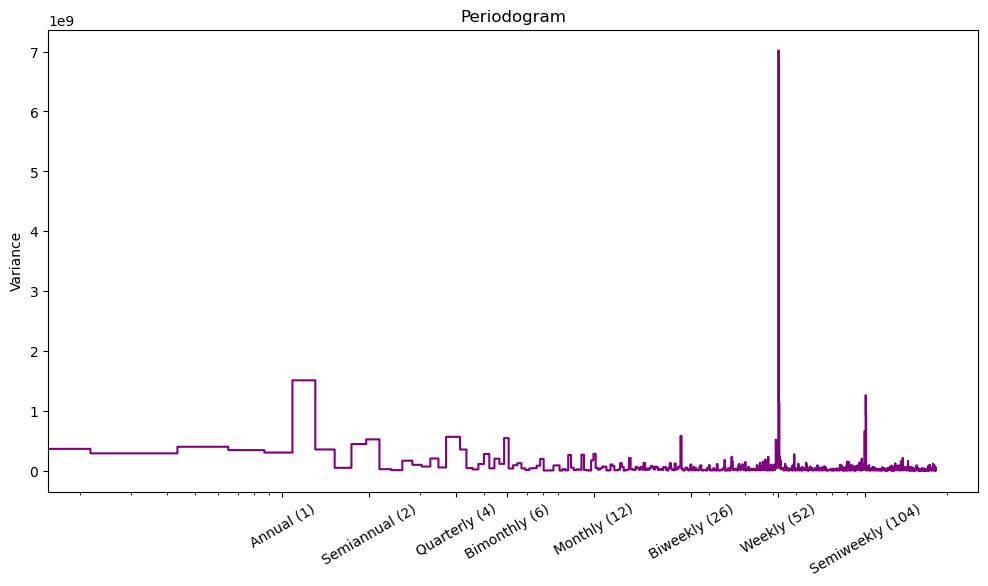

In [74]:
plot_periodogram(df[['date','sales']].groupby('date').agg('sum').reset_index().sales)

In [75]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'type_holiday',
       'locale', 'dcoilwtico', 'city', 'state', 'type_stores', 'cluster',
       'day', 'dayofweek', 'month', 'year', 'payday', 'earthquake',
       'transactions'],
      dtype='object')

<Axes: xlabel='year'>

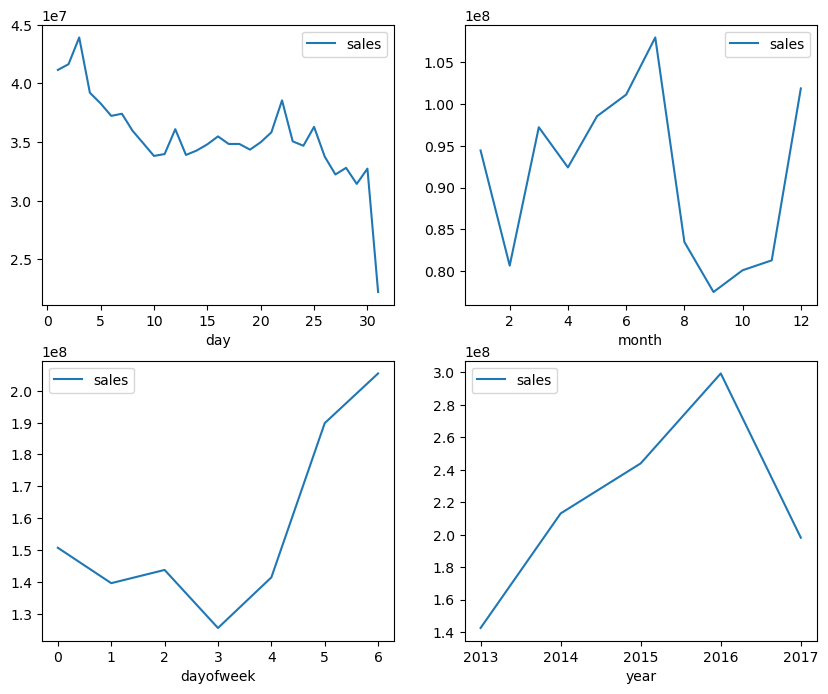

In [76]:
fig, axs = plt.subplots(2,2, figsize = (10,8))

df[['day','sales']].groupby('day').agg('sum').reset_index().plot(x='day', y = 'sales', ax= axs[0,0])
df[['dayofweek','sales']].groupby('dayofweek').agg('sum').reset_index().plot(x='dayofweek', y = 'sales', ax= axs[1,0])
df[['month','sales']].groupby('month').agg('sum').reset_index().plot(x='month', y = 'sales', ax= axs[0,1])
df[['year','sales']].groupby('year').agg('sum').reset_index().plot(x='year', y = 'sales', ax= axs[1,1])

# make a prediction

In [77]:
len(df['date'].unique())*0.8

1347.2

In [78]:
list(df['date'].unique())[1347]

Timestamp('2016-09-12 00:00:00')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 19 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int32         
 2   family        category      
 3   sales         float32       
 4   onpromotion   int32         
 5   type_holiday  object        
 6   locale        object        
 7   dcoilwtico    float64       
 8   city          category      
 9   state         category      
 10  type_stores   category      
 11  cluster       int32         
 12  day           int32         
 13  dayofweek     int32         
 14  month         int32         
 15  year          int32         
 16  payday        bool          
 17  earthquake    int32         
 18  transactions  float64       
dtypes: bool(1), category(4), datetime64[ns](1), float32(1), float64(2), int32(8), object(2)
memory usage: 235.9+ MB


In [80]:
df.head()

,date,store_nbr,family,sales,onpromotion,type_holiday,locale,dcoilwtico,city,state,type_stores,cluster,day,dayofweek,month,year,payday,earthquake,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,93.14,Quito,Pichincha,D,13,1,1,1,2013,False,0,0.0


In [81]:
df = df.drop('locale', axis = 1)

In [82]:
df['type_holiday'] = df['type_holiday'].astype('category') 
df['payday'] = df['payday'].astype(int)

In [83]:
cat_cols = list(df.select_dtypes(exclude='number').columns)
cat_cols.pop(0)
cat_cols

['family', 'type_holiday', 'city', 'state', 'type_stores']

In [84]:
transform_df = pd.get_dummies(df, columns= cat_cols)
transform_df.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,day,dayofweek,month,year,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_stores_A,type_stores_B,type_stores_C,type_stores_D,type_stores_E
0,2013-01-01,1,0.0,0,93.14,13,1,1,1,2013,...,False,True,False,False,False,False,False,False,True,False
1,2013-01-01,1,0.0,0,93.14,13,1,1,1,2013,...,False,True,False,False,False,False,False,False,True,False
2,2013-01-01,1,0.0,0,93.14,13,1,1,1,2013,...,False,True,False,False,False,False,False,False,True,False
3,2013-01-01,1,0.0,0,93.14,13,1,1,1,2013,...,False,True,False,False,False,False,False,False,True,False
4,2013-01-01,1,0.0,0,93.14,13,1,1,1,2013,...,False,True,False,False,False,False,False,False,True,False


In [85]:
split_date = '2016-09-12'
train_set = transform_df[transform_df['date'] < split_date]
val_set = transform_df[transform_df['date'] >= split_date]

In [86]:
# fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# sns.lineplot(x='date', y='sales', data=train_set, color='b', ax = axes)
# sns.lineplot(x='date', y='sales',data=val_set, color='r', ax = axes)

In [87]:
X_train = train_set.drop(['sales','date'], axis = 1)
y_train = train_set['sales']
X_val = val_set.drop(['sales','date'], axis = 1)
y_val = val_set['sales']

In [88]:
X_train.head()

,store_nbr,onpromotion,dcoilwtico,cluster,day,dayofweek,month,year,payday,earthquake,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_stores_A,type_stores_B,type_stores_C,type_stores_D,type_stores_E
0,1,0,93.14,13,1,1,1,2013,0,0,...,False,True,False,False,False,False,False,False,True,False
1,1,0,93.14,13,1,1,1,2013,0,0,...,False,True,False,False,False,False,False,False,True,False
2,1,0,93.14,13,1,1,1,2013,0,0,...,False,True,False,False,False,False,False,False,True,False
3,1,0,93.14,13,1,1,1,2013,0,0,...,False,True,False,False,False,False,False,False,True,False
4,1,0,93.14,13,1,1,1,2013,0,0,...,False,True,False,False,False,False,False,False,True,False


In [89]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sales, dtype: float32

## xgb

In [90]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

In [91]:
early_stop = xgb.callback.EarlyStopping(rounds=20,
                                        metric_name='rmse',
                                        maximize=False,
                                       save_best= True,
                                        )

In [92]:
xb1 = XGBRegressor(objective='reg:squarederror', learning_rate = 0.5, n_estimators= 20000,#reg_lambda=0.005,
                   n_jobs = -1, callbacks=[early_stop], random_state=0)
xb1.fit(X_train,y_train, eval_set=[(X_val, y_val)], verbose= True)

y_pred = xb1.predict(X_val)
y_pred_filt = np.maximum(y_pred,0)
mae = mean_absolute_error(y_val, y_pred_filt)
mse = mean_squared_error(y_val, y_pred_filt)
rmse = mean_squared_error(y_val, y_pred_filt) 
r2 = r2_score(y_val, y_pred_filt)
msle = mean_squared_log_error(y_val, y_pred_filt)**0.5
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"RMSLE: {msle}")

[0]	validation_0-rmse:932.08065
[1]	validation_0-rmse:670.33476
[2]	validation_0-rmse:557.47277
[3]	validation_0-rmse:499.60776
[4]	validation_0-rmse:470.73781
[5]	validation_0-rmse:442.65830
[6]	validation_0-rmse:433.11962
[7]	validation_0-rmse:415.45720
[8]	validation_0-rmse:413.93023
[9]	validation_0-rmse:412.17489
[10]	validation_0-rmse:405.69830
[11]	validation_0-rmse:401.20927
[12]	validation_0-rmse:400.97679
[13]	validation_0-rmse:393.46635
[14]	validation_0-rmse:389.14631
[15]	validation_0-rmse:386.99469
[16]	validation_0-rmse:384.67724
[17]	validation_0-rmse:384.18383
[18]	validation_0-rmse:381.26444
[19]	validation_0-rmse:386.52253
[20]	validation_0-rmse:379.37069
[21]	validation_0-rmse:379.46383
[22]	validation_0-rmse:377.62817
[23]	validation_0-rmse:374.84208
[24]	validation_0-rmse:370.55306
[25]	validation_0-rmse:369.81164
[26]	validation_0-rmse:369.25811
[27]	validation_0-rmse:368.56001
[28]	validation_0-rmse:361.22561
[29]	validation_0-rmse:358.10306
[30]	validation_0-rm

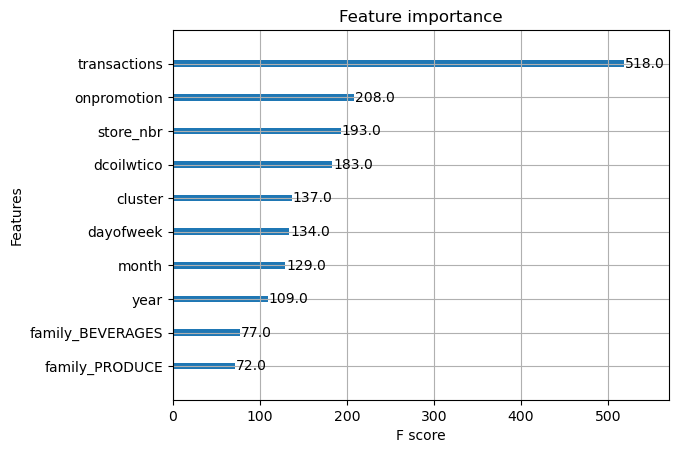

In [93]:
# ploting feature importances
_ = plot_importance(xb1,max_num_features = 10)

C:\Users\DzakiyFaridFadhilah\AppData\Local\Temp\ipykernel_13932\942046919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set['prediction'] = np.maximum(y_pred,0)
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='sales'>

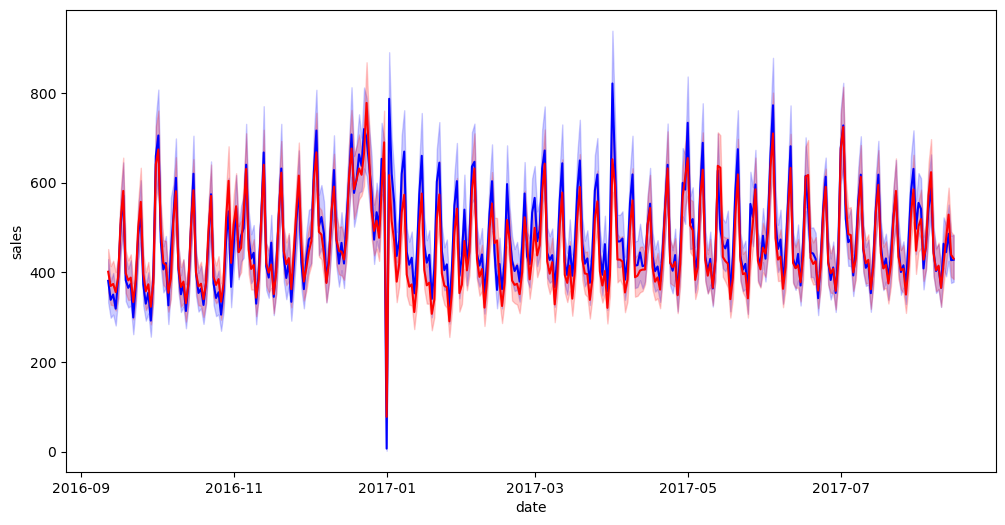

In [94]:
val_set['prediction'] = np.maximum(y_pred,0)
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# sns.lineplot(x='date', y='sales', data=train_set, color='b', ax = axes)
sns.lineplot(x='date', y='sales',data=val_set, color='b', ax = axes)
sns.lineplot(x='date', y='prediction',data=val_set, color='r', ax = axes)

In [95]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

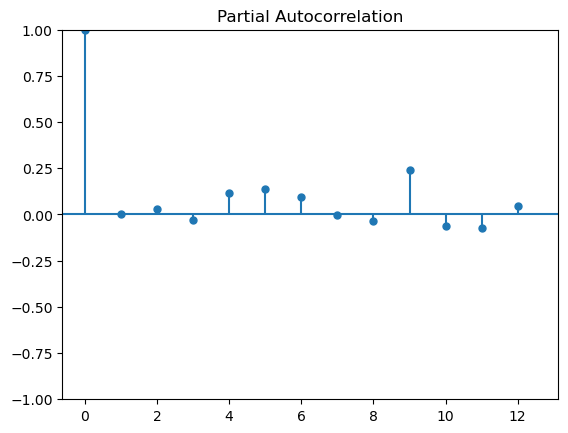

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(train_holi_oil_store['sales'], lags=12)

## lightgbm

In [97]:
import re

def clean_column_names(df):
    clean_columns = {}
    for col in df.columns:
        clean_col = re.sub(r'[^a-zA-Z0-9_]', ' ', col)  # Replace special characters with underscore
        clean_columns[col] = clean_col
    df = df.rename(columns=clean_columns)
    return df

In [98]:
clean_X_train = clean_column_names(X_train)
clean_X_val = clean_column_names(X_val)

In [99]:
import lightgbm as lgb
lgbreg = lgb.LGBMRegressor(boosting_type = 'gbdt',
                           objective = 'mse',
                           random_state = 1)
lgb.early_stopping(10)
lgbreg.fit(clean_X_train,y_train, eval_metric= 'mse',
           eval_set=[(clean_X_val, y_val)]
           )
# cv_scores_lgb = cross_val_score(lgbreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
# cv_scores_lgb = -cv_scores_lgb
# print("Cross-Validation Scores:", cv_scores_lgb)
# print("%f crossval standard deviation of %f" % (cv_scores_lgb.mean(), cv_scores_lgb.std()))

y_pred = lgbreg.predict(clean_X_val)
y_pred_filt = np.maximum(y_pred,0)
mae = mean_absolute_error(y_val, y_pred_filt)
mse = mean_squared_error(y_val, y_pred_filt)
rmse = mean_squared_error(y_val, y_pred_filt) 
r2 = r2_score(y_val, y_pred_filt)
msle = mean_squared_log_error(y_val, y_pred_filt)**0.5
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"RMSLE: {msle}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 2443122, number of used features: 93
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 329.465668
MAE: 122.81777787818618
MSE: 134073.31053759778
RMSE: 134073.31053759778
R-squared: 0.9280549280211683
RMSLE: 1.5255819707292841


C:\Users\DzakiyFaridFadhilah\AppData\Local\Temp\ipykernel_13932\423648019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set['prediction'] = y_pred
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='sales'>

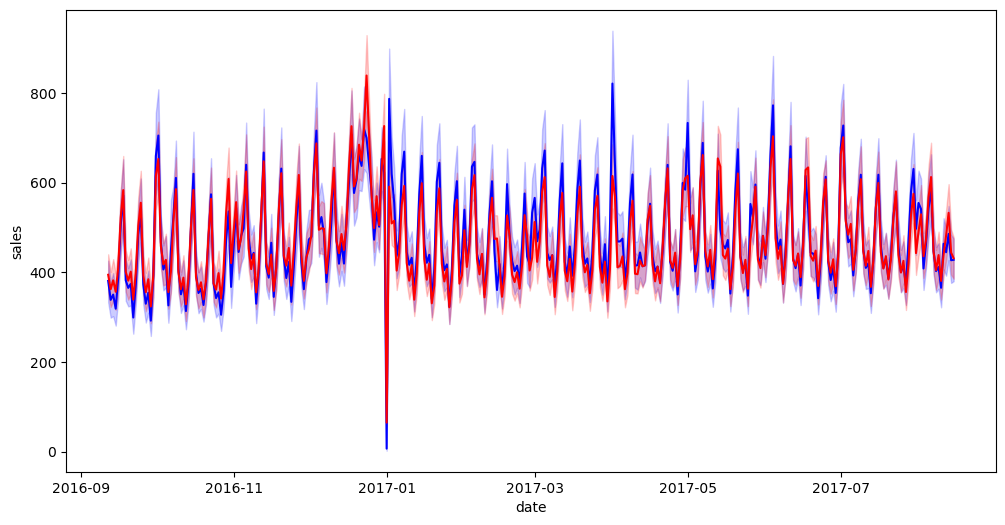

In [100]:
val_set['prediction'] = y_pred
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# sns.lineplot(x='date', y='sales', data=train_set, color='b', ax = axes)
sns.lineplot(x='date', y='sales',data=val_set, color='b', ax = axes)
sns.lineplot(x='date', y='prediction',data=val_set, color='r', ax = axes)

## catboost

In [101]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(iterations=2000, 
                       learning_rate=0.5, 
                       depth=6, 
                       loss_function='RMSE',
                       random_state = 1945)
cb.fit(X_train, y_train, 
       eval_set=(X_val, y_val), 
       early_stopping_rounds=10, verbose=10)
# cv_scores_cb = cross_val_score(cb, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
# cv_scores_cb = -cv_scores_cb
# print("Cross-Validation Scores:", cv_scores_cb)
# print("%f crossval standard deviation of %f" % (cv_scores_cb.mean(), cv_scores_cb.std()))
y_pred = cb.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred) **0.5
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

y_pred_filt = np.maximum(y_pred,0)
msle = mean_squared_log_error(y_val, y_pred_filt)**0.5
print(f"RMSLE: {msle}")

0:	learn: 704.6455980	test: 940.0070306	best: 940.0070306 (0)	total: 781ms	remaining: 26m 1s
10:	learn: 403.7493684	test: 465.6182381	best: 465.6182381 (10)	total: 6.63s	remaining: 19m 59s
20:	learn: 369.7033975	test: 423.4466806	best: 423.4466806 (20)	total: 11.9s	remaining: 18m 45s
30:	learn: 350.5098675	test: 394.9210580	best: 394.9210580 (30)	total: 18.8s	remaining: 19m 53s
40:	learn: 329.3973706	test: 388.1166273	best: 388.1166273 (40)	total: 24.5s	remaining: 19m 29s
50:	learn: 317.6096505	test: 375.0264454	best: 375.0264454 (50)	total: 30.3s	remaining: 19m 17s
60:	learn: 308.4678908	test: 368.9184212	best: 368.0911444 (58)	total: 36s	remaining: 19m 4s
70:	learn: 297.6596528	test: 364.0788396	best: 364.0081893 (69)	total: 41.7s	remaining: 18m 52s
80:	learn: 290.9732324	test: 362.0760748	best: 362.0760748 (80)	total: 48.6s	remaining: 19m 11s
90:	learn: 284.3499347	test: 355.0706689	best: 355.0706689 (90)	total: 55.2s	remaining: 19m 18s
100:	learn: 280.9577657	test: 351.4379927	best

C:\Users\DzakiyFaridFadhilah\AppData\Local\Temp\ipykernel_13932\423648019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set['prediction'] = y_pred
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DzakiyFaridFadhilah\anaconda3\

<Axes: xlabel='date', ylabel='sales'>

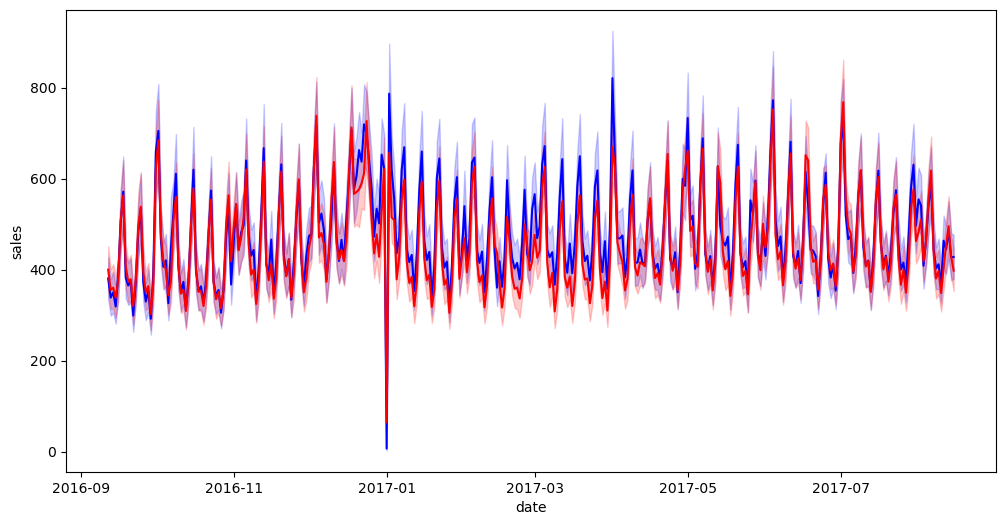

In [102]:
val_set['prediction'] = y_pred
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# sns.lineplot(x='date', y='sales', data=train_set, color='b', ax = axes)
sns.lineplot(x='date', y='sales',data=val_set, color='b', ax = axes)
sns.lineplot(x='date', y='prediction',data=val_set, color='r', ax = axes)